## kNN. Линейные модели. Работа с признаками

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('penguins_data.csv')
df.head(10)


,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
5,Gentoo,Biscoe,Yes,22,48.1,15.1,209.0,5500.0,MALE,8.45738,-26.22664
6,Gentoo,Biscoe,Yes,13,51.1,16.5,225.0,5250.0,MALE,8.20660,-26.36863
7,Gentoo,Biscoe,No,392,42.7,13.7,208.0,3950.0,FEMALE,8.14567,-26.59467
8,Adelie,Biscoe,Yes,14,39.6,20.7,191.0,3900.0,FEMALE,8.80967,-26.78958
9,Gentoo,Biscoe,Yes,735,46.1,13.2,211.0,4500.0,FEMALE,7.99300,-25.51390


**Задача 1.1** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

В этом задании был использован метод dropna() для исключения пустых ячеек в заданных столбцах, оригинальный датафрейм с исключенными строками был занесен в новую переменную df_notnull. В переменную categorical_columns помещены названия столбцов, в которых присутствуют категориальные признаки. Далее был создан OrdinalEncoder. Далее OrdinalEncoder был применен к датафрейму и категориальные признаки стали закодированными.

In [ ]:
df_notnull = df.dropna(subset=['Clutch Completion', 'Sex'])
df_encoded=df_notnull
categorical_columns = ['Species', 'Island', 'Clutch Completion', 'Sex']
ordinal_encoder = OrdinalEncoder()

df_encoded[categorical_columns] = ordinal_encoder.fit_transform(df_encoded[categorical_columns])
df_encoded.head(10)

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.0,1.0,1.0,382,50.9,19.1,196.0,3550.0,2.0,10.02372,-24.86594
1,1.0,1.0,1.0,741,45.2,17.8,198.0,3950.0,1.0,8.88942,-24.49433
2,2.0,0.0,1.0,744,46.5,13.5,210.0,4550.0,1.0,7.99530,-25.32829
3,1.0,1.0,1.0,10,45.2,16.6,191.0,3250.0,1.0,9.62357,-24.78984
4,2.0,0.0,1.0,13,48.4,14.4,203.0,4625.0,1.0,8.16582,-26.13971
5,2.0,0.0,1.0,22,48.1,15.1,209.0,5500.0,2.0,8.45738,-26.22664
6,2.0,0.0,1.0,13,51.1,16.5,225.0,5250.0,2.0,8.20660,-26.36863
7,2.0,0.0,0.0,392,42.7,13.7,208.0,3950.0,1.0,8.14567,-26.59467
8,0.0,0.0,1.0,14,39.6,20.7,191.0,3900.0,1.0,8.80967,-26.78958
9,2.0,0.0,1.0,735,46.1,13.2,211.0,4500.0,1.0,7.99300,-25.51390


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

В этой части задания для кодирования целевой категориальной переменной практически те же действия, за исключением того, что здесь в качестве аргумента для OrdinalEncoder сразу были занесены категории в том порядке, в котором они нам нужны

In [ ]:
enc= ['Chinstrap','Gentoo', 'Adelie']
encoder = OrdinalEncoder(categories = [enc])
df_species_encoded=df
df_species_encoded['Species']=encoder.fit_transform(df[['Species']])
df_species_encoded


,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0.0,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,0.0,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,1.0,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,0.0,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,1.0,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,0.0,Dream,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,2.0,Torgersen,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,2.0,Biscoe,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,1.0,Biscoe,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


**Задача 1.2** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

В этом задании для разделения выборки были созданы переменные X и Y. В Х помещены все столбцы, кроме целевого (для его исключения был использован метод drop()). В Y помещена целевая переменная. Далее с помощью train_test_split() выборка была разделена на тестовую и обучающую, тестовая выборка составила 30% (test_size=0.3), аргумент stratify сохраняет оригинальное распределение классов в обучающей и тестовой выборках, это важно потому что если процентное соотношение в классах будет другим, то оценка модели будет не честной

In [ ]:
np.random.seed(42)
X = df_encoded.drop('Species', axis=1)
y = df_encoded['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Размеры выборок:")
print(f"Обучающая выборка: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Тестовая выборка: X_test {X_test.shape}, y_test {y_test.shape}")

print("\nРаспределение классов:")
print("Исходные данные:")
print(y.value_counts(normalize=True))
print("\nОбучающая выборка:")
print(y_train.value_counts(normalize=True))
print("\nТестовая выборка:")
print(y_test.value_counts(normalize=True))

Размеры выборок:
Обучающая выборка: X_train (240, 10), y_train (240,)
Тестовая выборка: X_test (104, 10), y_test (104,)

Распределение классов:
Исходные данные:
Species
0.0    0.441860
2.0    0.360465
1.0    0.197674
Name: proportion, dtype: float64

Обучающая выборка:
Species
0.0    0.441667
2.0    0.362500
1.0    0.195833
Name: proportion, dtype: float64

Тестовая выборка:
Species
0.0    0.442308
2.0    0.355769
1.0    0.201923
Name: proportion, dtype: float64


**Задача 1.3** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
df_notnull['Clutch Completion'] = df_notnull['Clutch Completion'].fillna('Yes')
df_notnull['Sex'] = df_notnull['Sex'].fillna('MALE')

# Кодируем категориальные переменные
df_notnull['Species'] = df_notnull['Species'].astype('category').cat.codes
df_notnull['Island'] = df_notnull['Island'].astype('category').cat.codes
df_notnull['Clutch Completion'] = df_notnull['Clutch Completion'].map({'No': 0, 'Yes': 1})
df_notnull['Sex'] = df_notnull['Sex'].map({'FEMALE': 0, 'MALE': 1})

# Удалим строки с пропущенными значениями в используемых признаках
df_notnull = df_notnull.dropna(subset=['Flipper Length (mm)', 'Body Mass (g)', 'Species'])

# Разделяем данные
X = df_notnull[['Flipper Length (mm)', 'Body Mass (g)']]  # Только два признака
y = df_notnull['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Масштабируем признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Создаем DataFrame для результатов
results = []

# Обучаем классификаторы с разным числом соседей
neighbors = [1, 3, 5, 10, 15, 25]

for n in neighbors:
    # Создаем и обучаем классификатор
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train_scaled, y_train)

    # Предсказания на тренировочной и тестовой выборках
    y_train_pred = knn.predict(X_train_scaled)
    y_test_pred = knn.predict(X_test_scaled)

    # Вычисляем accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    results.append({
        'NN': n,
        'Train': round(train_accuracy, 2),
        'Test': round(test_accuracy, 2)
    })
results_df = pd.DataFrame(results)

# Выводим результаты в требуемом формате
print("NN\tTrain\tTest")
for _, row in results_df.iterrows():
    print(f"{row['NN']}\t{row['Train']}\t{row['Test']}")

NN	Train	Test
1.0	0.97	0.77
3.0	0.87	0.77
5.0	0.87	0.79
10.0	0.84	0.8
15.0	0.83	0.8
25.0	0.83	0.8


**Задача 1.4** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions


**Задача 1.5** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

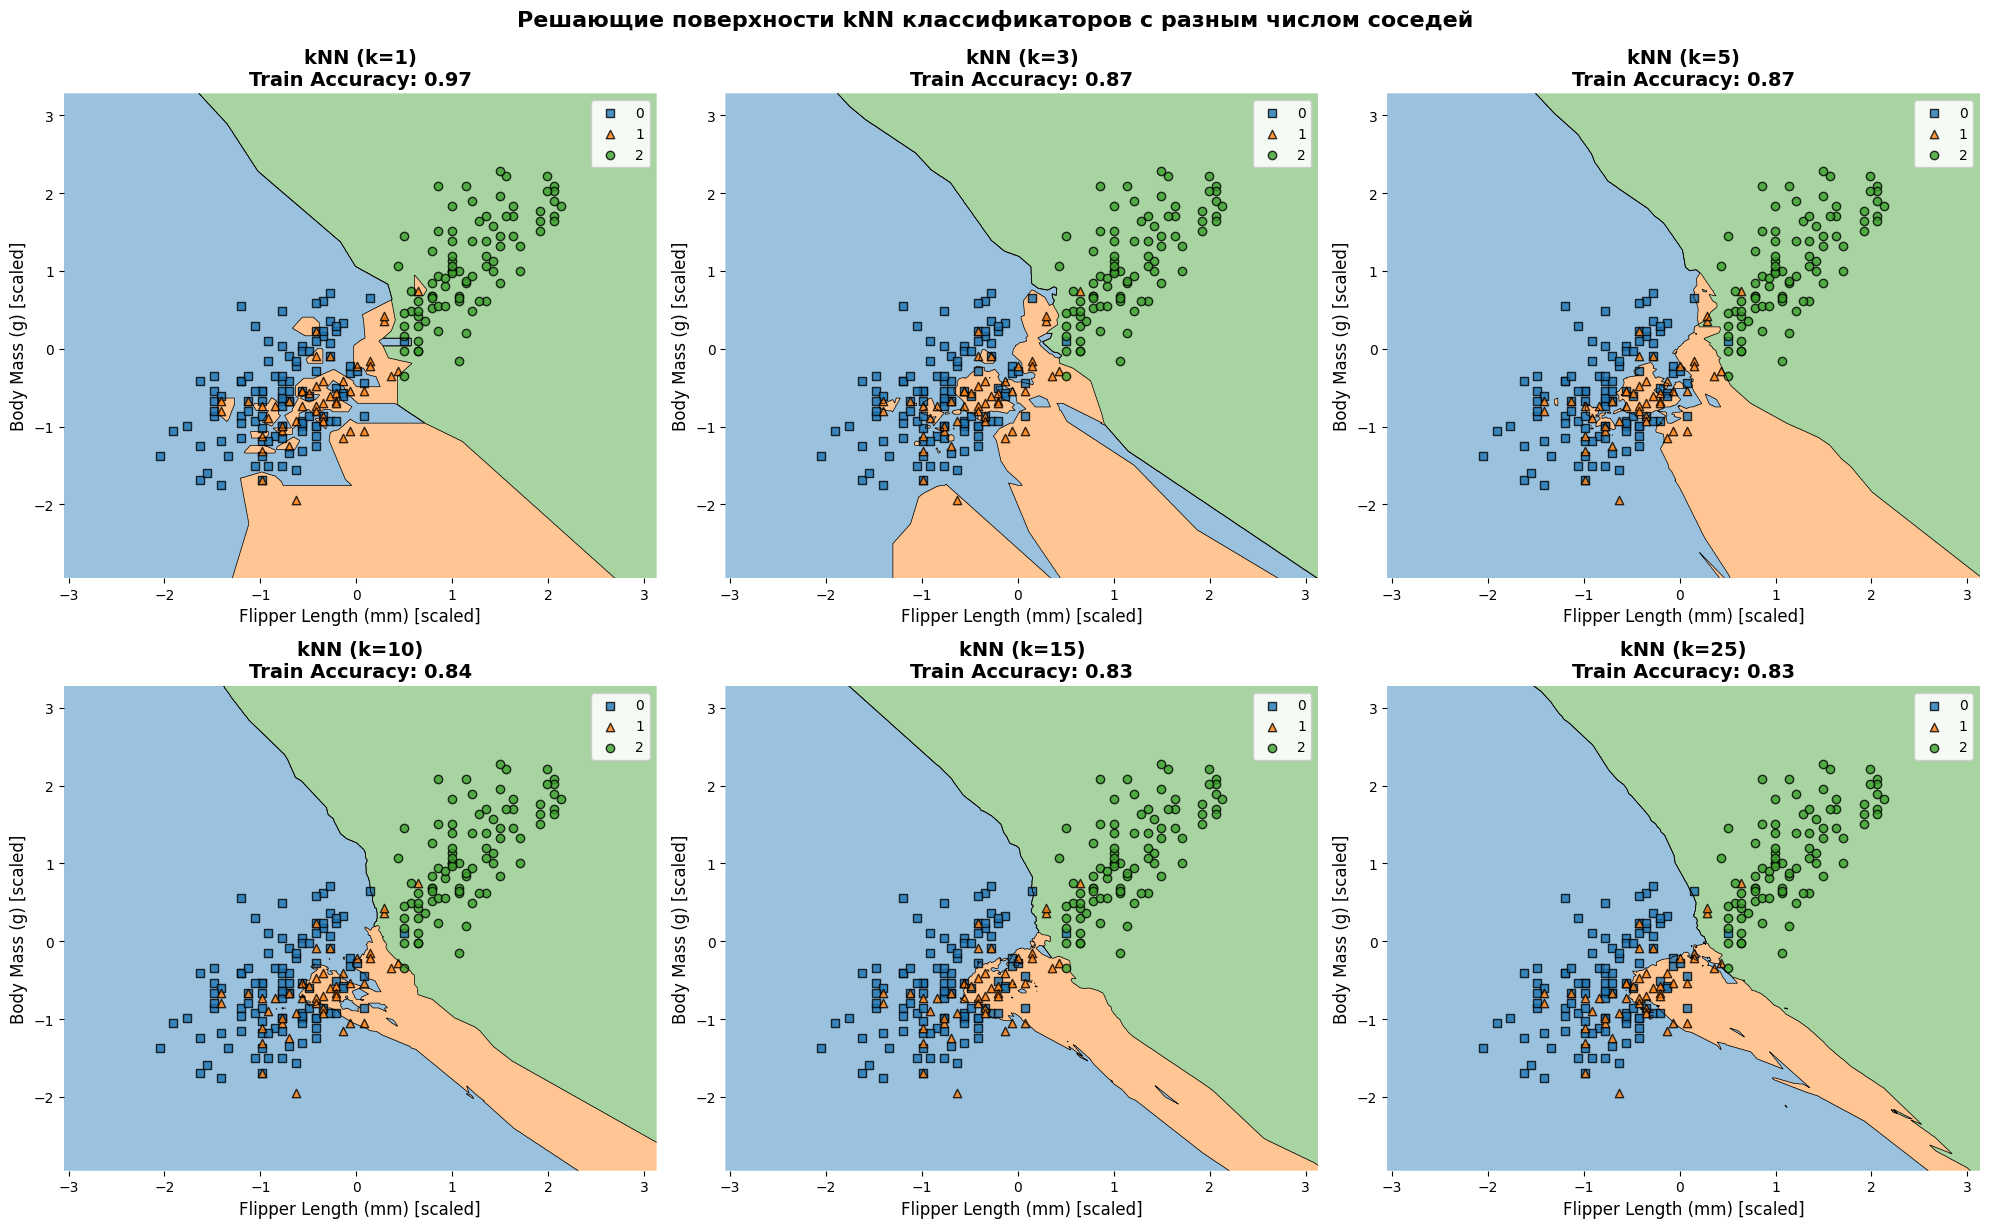

In [ ]:
classifiers = []
neighbors = [1, 3, 5, 10, 15, 25]

# Обучаем классификаторы (или используем уже обученные из предыдущего шага)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    classifiers.append(knn)

# Подготовка данных для визуализации
X_vis = X_train_scaled  # Масштабированные тренировочные данные
y_vis = y_train.values  # Преобразуем в numpy array

# Создаем фигуру и сетку для графиков
fig = plt.figure(figsize=(20, 12))
gs = gridspec.GridSpec(2, 3, figure=fig)  # 2 строки, 3 столбца

# Создаем итератор по всем ячейкам сетки
grid = itertools.product([0, 1], [0, 1, 2])  # (row, col)
# Функция для получения названия класса
def get_class_names(y):
    unique_classes = np.unique(y)
    class_names = []
    for cls in unique_classes:
        # Получаем оригинальное название вида пингвина
        original_species = df_encoded[df_encoded['Species'] == cls]['Species'].iloc[0]
        # В нашем случае Species уже закодированы, но можно добавить названия
        class_names.append(f'Class {cls}')
    return class_names

# Строим графики для каждого классификатора
for clf, (row, col), n in zip(classifiers, grid, neighbors):
    ax = plt.subplot(gs[row, col])
    # Рисуем решающие поверхности
    plot_decision_regions(X=X_vis, y=y_vis, clf=clf, legend=2, ax=ax)

    # Настраиваем внешний вид
    ax.set_xlabel('Flipper Length (mm) [scaled]', fontsize=12)
    ax.set_ylabel('Body Mass (g) [scaled]', fontsize=12)
    ax.set_title(f'kNN (k={n})\nTrain Accuracy: {accuracy_score(y_vis, clf.predict(X_vis)):.2f}',
                 fontsize=14, fontweight='bold')

    # Улучшаем легенду
    ax.legend(loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.suptitle('Решающие поверхности kNN классификаторов с разным числом соседей',
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

**Задача 1.6** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

NN	Train	Test
1.0	0.97	0.77
3.0	0.87	0.77
5.0	0.87	0.79
10.0	0.84	0.8
15.0	0.83	0.8
25.0	0.83	0.8

при k 1 разница тренировочной и тестовой выборки составляет 20%, что очень много и является недообучением
при k 3 разница тренировочной и тестовой выборки составляет 10%, что чуть больше нормы и является небольшим недообучением
при k 5 разница тренировочной и тестовой выборки составляет 8%, что входит в диапазон нормы и является опитимальным
при k 10-25 трейн выборка опустилась до 0.83, что является недообучением

поэтому самым оптимальным k является 5

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

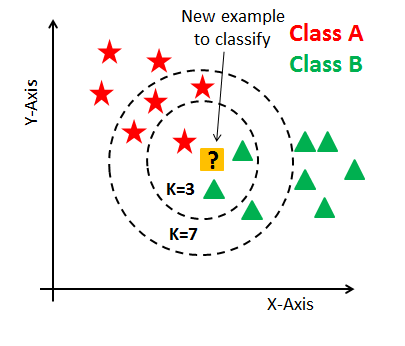

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

      # YOUR CODE HERE
      # (⌒_⌒;)

      pass

    def predict(self, X):
      predictions = []
      for x in X:
          distances = []
          for i, x_train in enumerate(self.X_train):
              dist = self.count_distance(x, x_train)
              distances.append((dist, self.y_train[i]))

          distances.sort(key=lambda x: x[0])
          k_nearest = distances[:self.k]
          k_nearest_labels = [label for _, label in k_nearest]

          most_common = Counter(k_nearest_labels).most_common(1)
          predictions.append(most_common[0][0])

      return np.array(predictions)


      # YOUR CODE HERE
      # (＠_＠)

      pass

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))

      # YOUR CODE HERE
      # ヽ(♡‿♡)ノ

      pass

In [ ]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [ ]:
X_knn = df_notnull[['Flipper Length (mm)', 'Body Mass (g)']].values
y_knn = df_notnull['Species'].values
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42, stratify=y_knn)
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)
best_k = None
best_accuracy = 0

neighbors = [1, 3, 5, 10, 15, 25]

for k in neighbors:
    knn_custom = KNN(k=k)
    knn_custom.fit(X_train_scaled_knn, y_train_knn)
    y_test_pred_knn = knn_custom.predict(X_test_scaled_knn)
    test_accuracy_knn = accuracy_score(y_test_knn, y_test_pred_knn)
    if test_accuracy_knn > best_accuracy:
        best_accuracy = test_accuracy_knn
        best_k = k

print(f"Лучшее k: {best_k} с точностью {best_accuracy:.4f} на test.")

Лучшее k: 10 с точностью 0.8058 на test.


### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data_notnull=data[data.notnull().any(axis=1)]
if 'Unnamed: 0' in data_notnull.columns:
    data_notnull = data_notnull.drop('Unnamed: 0', axis=1)
data_notnull

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
print("Вещественные признаки:")
print(numeric_columns.tolist())
correlation_matrix = data[numeric_columns].corr()
print("\nМатрица корреляций:")
print(correlation_matrix.round(3))
target_column = 'price'
correlations_with_target = correlation_matrix[target_column].sort_values(ascending=False)
print(f"\nКорреляции с целевой переменной '{target_column}':")
print(correlations_with_target.round(3))
top_correlations = correlations_with_target[correlations_with_target.index != target_column].head(3)
print(f"\nТоп-3 признака с наибольшей корреляцией с '{target_column}':")
for feature, corr in top_correlations.items():
    print(f"{feature}: {corr:.3f}")

Вещественные признаки:
['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Матрица корреляций:
            Unnamed: 0  carat  depth  table  price      x      y      z
Unnamed: 0       1.000 -0.378 -0.035 -0.101 -0.307 -0.405 -0.396 -0.399
carat           -0.378  1.000  0.028  0.182  0.922  0.975  0.952  0.953
depth           -0.035  0.028  1.000 -0.296 -0.011 -0.025 -0.029  0.095
table           -0.101  0.182 -0.296  1.000  0.127  0.195  0.184  0.151
price           -0.307  0.922 -0.011  0.127  1.000  0.884  0.865  0.861
x               -0.405  0.975 -0.025  0.195  0.884  1.000  0.975  0.971
y               -0.396  0.952 -0.029  0.184  0.865  0.975  1.000  0.952
z               -0.399  0.953  0.095  0.151  0.861  0.971  0.952  1.000

Корреляции с целевой переменной 'price':
price         1.000
carat         0.922
x             0.884
y             0.865
z             0.861
table         0.127
depth        -0.011
Unnamed: 0   -0.307
Name: price, dtype: float64

Топ-3 призн

**Задача 3.3** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [ ]:
data_encoded = pd.get_dummies(data_notnull, columns=data_notnull.select_dtypes(include=['object']).columns, drop_first=True)
data_encoded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


**Задача 3.4** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [ ]:
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 3.5** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_columns = X.select_dtypes(include=[np.number]).columns
print("Вещественные признаки для масштабирования:")
print(numeric_columns.tolist())
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

print(f"\nРазмеры после масштабирования:")
print(f"X_train_scaled: {X_train_scaled.shape}")
print(f"X_test_scaled: {X_test_scaled.shape}")
print("\nСтатистика до масштабирования (carat):")
print(f"Среднее: {X_train['carat'].mean():.3f}, Стандартное отклонение: {X_train['carat'].std():.3f}")

print("\nСтатистика после масштабирования (carat):")
print(f"Среднее: {X_train_scaled['carat'].mean():.3f}, Стандартное отклонение: {X_train_scaled['carat'].std():.3f}")

print("\nПервые 3 строки X_train_scaled:")
print(X_train_scaled.head(3))

Вещественные признаки для масштабирования:
['carat', 'depth', 'table', 'x', 'y', 'z']

Размеры после масштабирования:
X_train_scaled: (37758, 23)
X_test_scaled: (16182, 23)

Статистика до масштабирования (carat):
Среднее: 0.800, Стандартное отклонение: 0.476

Статистика после масштабирования (carat):
Среднее: 0.000, Стандартное отклонение: 1.000

Первые 3 строки X_train_scaled:
          carat     depth     table         x         y         z  cut_Good  \
19497  0.862659 -0.311437 -0.207099  1.055581  0.986556  0.968253     False   
31229 -1.029889  0.178549 -0.656213 -1.207734 -1.202544 -1.168276     False   
22311  0.862659  0.458541 -0.207099  0.904099  0.951670  0.982309     False   

       cut_Ideal  cut_Premium  cut_Very Good  ...  color_H  color_I  color_J  \
19497       True        False          False  ...     True    False    False   
31229       True        False          False  ...    False    False    False   
22311       True        False          False  ...    False    

**Задача 3.6** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
def mse(y, y_pred):
  return np.mean((y-y_pred)**2)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

train_mse =  mse(y_train, y_train_pred)
test_mse = mse(y_test, y_test_pred)

print(f"MSE train: {train_mse:.2f}")
print(f"MSE test: {test_mse:.2f}")

MSE train: 1290541.91
MSE test: 1244765.44


**Задача 3.7** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
coefficients = pd.DataFrame({'feature': X_train_scaled.columns,'coefficient': lr.coef_})

print("Коэффициенты линейной регрессии:")
print(coefficients)
numeric_features = X_train_scaled.select_dtypes(include=[np.number]).columns
numeric_coeffs = coefficients[coefficients['feature'].isin(numeric_features)]
print("\nКоэффициенты вещественных признаков:")
print(numeric_coeffs)
max_coeff = numeric_coeffs['coefficient'].abs().max()
threshold = max_coeff / 10  # на порядок = в 10 раз
significant_features = numeric_coeffs[numeric_coeffs['coefficient'].abs() > threshold]
print(f"\nВещественные признаки с коэффициентами > {threshold:.2f}:")
print(significant_features)

Коэффициенты линейной регрессии:
          feature  coefficient
0           carat  5338.615671
1           depth   -90.173817
2           table   -60.332280
3               x -1100.418850
4               y    -6.458917
5               z   -34.258945
6        cut_Good   595.521080
7       cut_Ideal   846.196258
8     cut_Premium   777.769963
9   cut_Very Good   743.301360
10        color_E  -217.028968
11        color_F  -273.303976
12        color_G  -500.160238
13        color_H  -998.634669
14        color_I -1476.084233
15        color_J -2381.989788
16     clarity_IF  5459.037300
17    clarity_SI1  3751.709671
18    clarity_SI2  2781.940548
19    clarity_VS1  4657.834307
20    clarity_VS2  4336.725583
21   clarity_VVS1  5101.335181
22   clarity_VVS2  5028.295530

Коэффициенты вещественных признаков:
  feature  coefficient
0   carat  5338.615671
1   depth   -90.173817
2   table   -60.332280
3       x -1100.418850
4       y    -6.458917
5       z   -34.258945

Вещественные признаки с

**Задача 3.8** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(alpha=10)
ridge = Ridge(alpha=10)

lasso.fit(X, y)
ridge.fit(X, y)
print("Веса без регуляризации:", lr.coef_)
print("Веса Lasso (alpha=10):", lasso.coef_)
print("Веса Ridge (alpha=10):", ridge.coef_)

print("Норма весов (L2) без регуляризации:", np.linalg.norm(lr.coef_))
print("Норма весов (L2) Lasso:", np.linalg.norm(lasso.coef_))
print("Норма весов (L2) Ridge:", np.linalg.norm(ridge.coef_))

Веса без регуляризации: [ 5338.61567061   -90.17381703   -60.33227991 -1100.41885004
    -6.45891672   -34.25894462   595.52108013   846.19625755
   777.76996276   743.30136029  -217.02896774  -273.30397584
  -500.16023818  -998.63466917 -1476.08423332 -2381.98978847
  5459.03729976  3751.70967126  2781.94054814  4657.83430708
  4336.72558298  5101.33518107  5028.29553044]
Веса Lasso (alpha=10): [ 9585.58770552  -104.24293794   -51.39702342  -443.36936361
    -0.            -0.            -0.           153.10205369
    74.66662093    83.18798317     0.            -0.
  -118.05763319  -594.90067361  -979.91247151 -1752.84391109
  1322.09768238     0.          -795.59231853   826.76265633
   585.5611749   1174.17514371  1178.54656814]
Веса Ridge (alpha=10): [11024.95158724   -62.54309929   -27.01216168  -924.10054748
    12.70668587   -48.91205848   598.98369776   856.28514353
   783.56186247   751.99881856  -200.77780106  -264.87413916
  -469.66915987  -965.54929053 -1443.41558992 -2336

## Бонусная часть

**Задача 3.9** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

**Задача 3.11** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

**Задача 3.12** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.